In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nan_values_of_all_columns(this_df, return_dict:[bool] = False):
    """prints (defaults) or returns dictionary of all columns in this_df and their respective nan-values"""
    if not return_dict:
        for col in this_df.columns:
            print(col, this_df[col].isna().sum())
        return
    return {col:this_df[col].isna().sum() for col in this_df.columns}

In [3]:
def columns_dataset_overview():
    """PROJECTSPECIFIC!!!!"""
    col_dat18 = [_ for _ in data2018.columns]
    col_dat19 = [_ for _ in data2019.columns]
    col_dat20 = [_ for _ in data2020.columns]
    print("2018:",len(col_dat18),"columns")
    print("2019:",len(col_dat19),"columns")
    print("2020:",len(col_dat20),"columns")
    
    columns_in_all = []
    for c in col_dat18:
        if c not in columns_in_all:
            if c in col_dat19 and c in col_dat20:
                columns_in_all.append(c)
    print("Number of columns identical in all datasets:", len(columns_in_all))
    print(columns_in_all)
    # ---
    print("\nMismatching columns:")
    columns_not_in_all = []
    for c in col_dat18:
        if c not in col_dat19 or c not in col_dat20:
            columns_not_in_all.append((c, 2018))
    for c in col_dat19:
        if c not in col_dat18 or c not in col_dat20:
            columns_not_in_all.append((c, 2019))
    for c in col_dat20:
        if c not in col_dat18 or c not in col_dat19:
            columns_not_in_all.append((c, 2020))
    for _ in columns_not_in_all:
        print(_)

In [4]:
def change_weekday(day:[int] = 0):
    weekdays = {
        1: "Sun",
        2: "Mon",
        3: "Tue",
        4: "Wed",
        5: "Thu",
        6: "Fri",
        7: "Sat",
    }
    if day == 0:
        return None
    return weekdays[day]

In [5]:
def bin_hours(hour:[int]):
    day_times = {
        "night": [0,1,2,3,4,5],
        "morning": [6,7,8,9,10,11],
        "afternoon": [12,13,14,15,16,17],
        "evening": [18,19,20,21,22,23],
    }
    for d_t, h in day_times.items():
        if hour in h:
            return d_t

In [6]:
print(bin_hours(1))

night


In [7]:
def change_acc_type(cat:[int]):
    if cat == 1:
        return "killed"
    elif cat == 2:
        return "seriously_injured"
    else:
        return "slightly_injured"

In [8]:
data2018 = pd.read_csv(r"data\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2018_Datensatz.csv", encoding="latin-1", sep=";")
data2019 = pd.read_csv(r"data\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatz.csv", encoding="latin-1", sep=";")
data2020 = pd.read_csv(r"data\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2020_Datensatz.csv", encoding="latin-1", sep=";")


In [9]:
x18 = data2018.groupby("UMONAT").count()
x19 = data2019.groupby("UMONAT").count()
x20 = data2020.groupby("UMONAT").count()

<AxesSubplot:xlabel='UMONAT'>

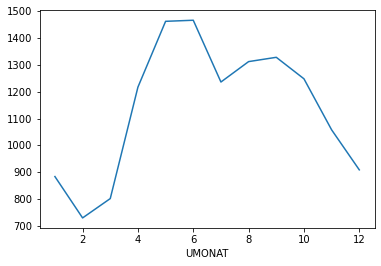

In [10]:
x18["OBJECTID"].plot()

<AxesSubplot:xlabel='UMONAT'>

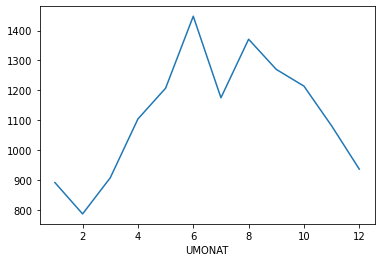

In [11]:
x19["OBJECTID"].plot()

<AxesSubplot:xlabel='UMONAT'>

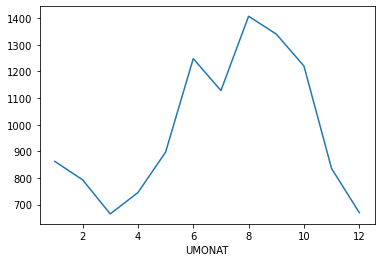

In [12]:
x20["OBJECTID"].plot()

In [13]:
columns_dataset_overview()

2018: 25 columns
2019: 24 columns
2020: 24 columns
Number of columns identical in all datasets: 21
['OBJECTID', 'LAND', 'BEZ', 'LOR', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84']

Mismatching columns:
('STRASSE', 2018)
('LOR_ab_2021', 2018)
('IstSonstig', 2018)
('STRZUSTAND', 2018)
('STRASSE', 2019)
('IstSonstige', 2019)
('USTRZUSTAND', 2019)
('LOR_ab_2021', 2020)
('IstSonstige', 2020)
('USTRZUSTAND', 2020)


In [14]:
x18 = data2018.groupby("UMONAT").count()


In [15]:
data2018.UKATEGORIE.value_counts()


3    11435
2     2176
1       41
Name: UKATEGORIE, dtype: int64

+ check mismatching columns

In [16]:
data2018["STRZUSTAND"].value_counts()

0    11048
1     2540
2       64
Name: STRZUSTAND, dtype: int64

In [17]:
data2019["USTRZUSTAND"].value_counts()

0                          10154
1                           3190
2                             45
Hellersdorfer Promenade        1
Name: USTRZUSTAND, dtype: int64

In [18]:
data2020["USTRZUSTAND"].value_counts()

0    9061
1    2728
2      21
Name: USTRZUSTAND, dtype: int64

In [19]:
data2018.rename(columns={'IstSonstig': 'IstSonstige', 'STRZUSTAND': 'USTRZUSTAND'}, inplace=True)

In [20]:
columns_dataset_overview()

2018: 25 columns
2019: 24 columns
2020: 24 columns
Number of columns identical in all datasets: 23
['OBJECTID', 'LAND', 'BEZ', 'LOR', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige', 'USTRZUSTAND', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84']

Mismatching columns:
('STRASSE', 2018)
('LOR_ab_2021', 2018)
('STRASSE', 2019)
('LOR_ab_2021', 2020)


In [21]:
data2018 = data2018[['OBJECTID', 'LAND', 'BEZ', 'LOR', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige', 'USTRZUSTAND', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84']]
data2019 = data2019[['OBJECTID', 'LAND', 'BEZ', 'LOR', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige', 'USTRZUSTAND', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84']]
data2020 = data2020[['OBJECTID', 'LAND', 'BEZ', 'LOR', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige', 'USTRZUSTAND', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84']]

In [22]:
data2018.sort_values("OBJECTID").head(25)

,OBJECTID,LAND,BEZ,LOR,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,112695,11,2,2050602.0,2018,1,15,4,3,6,...,1,1,0,0,0,1,"803604,1562","5827580,738","13,4750178","52,51359681"
1,112705,11,12,12304314.0,2018,1,11,2,3,2,...,1,0,0,0,0,0,"790639,5854","5835009,589","13,29102205","52,58725906"
2,112726,11,2,2040501.0,2018,1,9,3,3,6,...,1,1,0,0,0,0,"799827,9618","5828733,523","13,42057818","52,52601854"
3,112737,11,7,7020202.0,2018,1,17,2,3,6,...,1,1,0,0,0,0,"795223,509","5823525,402","13,34828776","52,48184447"
4,112747,11,3,3020209.0,2018,1,15,4,3,6,...,0,1,0,0,0,1,"798261,3849","5835047,26","13,40322797","52,58347154"
5,112770,11,10,10010206.0,2018,1,5,2,2,2,...,1,0,0,0,0,0,"808320,0275","5832060,055","13,54844656","52,5510946"
6,112792,11,4,4061757.0,2018,1,17,2,3,2,...,1,0,0,0,1,1,"788961,8201","5823583,542","13,25639043","52,48571541"
7,112805,11,3,3010104.0,2018,1,16,5,3,2,...,1,0,0,0,0,1,"799543,5822","5840743,375","13,42725182","52,63382261"
8,112820,11,1,1011303.0,2018,1,14,2,3,6,...,1,1,0,0,0,0,"799255,9754","5827907,973","13,41142938","52,51893299"
9,112837,11,12,12103218.0,2018,1,21,7,3,0,...,0,0,1,0,0,1,"794735,9234","5833763,947","13,35020475","52,57388905"


+ Conactenate all three datasets

In [23]:
data_all = pd.concat([data2018, data2019, data2020])

In [24]:
len(data_all)

38852

In [25]:
len(data_all["OBJECTID"].unique())

33003

In [26]:
# data_all["OBJECTID"][data_all[]]

In [27]:
data_all.columns

Index(['OBJECTID', 'LAND', 'BEZ', 'LOR', 'UJAHR', 'UMONAT', 'USTUNDE',
       'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'ULICHTVERH', 'IstRad',
       'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige', 'USTRZUSTAND',
       'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84'],
      dtype='object')

In [28]:
len(data_all) - len(data_all["OBJECTID"].unique())

5849

+ duplicated id's ?

In [29]:
data_all[data_all['OBJECTID'].duplicated() == True]

,OBJECTID,LAND,BEZ,LOR,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
7508,196811,11,5,5010312.0,2019,6,17,6,3,5,...,1,0,0,0,0,0,"785253,1509","5829957,841","13,20739","52,54482"
7509,196812,11,1,1011101.0,2019,7,23,7,3,5,...,1,0,0,0,0,0,"794594,2404","5826083,261","13,34131","52,50511"
7510,196813,11,3,3050923.0,2019,6,17,6,3,2,...,1,0,0,0,0,0,"800324,457","5831637,07","13,4305","52,55177"
7511,196814,11,1,1011402.0,2019,6,16,6,3,5,...,0,0,1,0,1,0,"798822,0794","5829758,526","13,40672","52,53576"
7512,196815,11,8,8041040.0,2019,7,23,7,2,0,...,0,0,1,0,0,1,"807011,1319","5817448,658","13,51574","52,42088"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,202775,11,1,1011303.0,2019,12,15,2,3,3,...,1,1,0,0,0,0,"799498,019","5828344,449","13,41538","52,52271"
13386,202776,11,1,1011201.0,2019,12,14,2,3,1,...,1,0,0,0,0,0,"797455,1835","5827060,276","13,38421","52,51232"
13387,202777,11,1,1011304.0,2019,12,14,2,3,2,...,1,0,0,0,1,0,"799730,882","5827547,138","13,41808","52,51544"
13388,202778,11,11,11030721.0,2019,12,18,4,2,5,...,1,0,1,0,0,0,"805189,971","5827912,648","13,49862","52,51569"


In [30]:
data_all[data_all["OBJECTID"]==202775]

,OBJECTID,LAND,BEZ,LOR,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
7792,202775,11,8,8030829.0,2018,7,20,2,3,5,...,0,0,1,0,1,0,"803574,3906","5818136,088","13,46598615","52,42896229"
13385,202775,11,1,1011303.0,2019,12,15,2,3,3,...,1,1,0,0,0,0,"799498,019","5828344,449","13,41538","52,52271"


In [31]:
data_all["LAND"].value_counts()

11    38852
Name: LAND, dtype: int64

In [32]:
data_all.drop(["OBJECTID", "LAND"], axis=1, inplace=True)

In [33]:
data_all["UWOCHENTAG"].value_counts().sort_values()

1    2943
7    4078
6    6056
2    6259
5    6445
3    6520
4    6551
Name: UWOCHENTAG, dtype: int64

In [34]:
data_all["weekday"] = list(map(change_weekday, data_all["UWOCHENTAG"]))
data_all.drop("UWOCHENTAG", axis=1, inplace=True)

In [35]:
data_all["accident_outcome"] = list(map(change_acc_type, data_all["UKATEGORIE"]))
data_all.drop("UKATEGORIE", axis=1, inplace=True)

In [36]:
data_all["time_of_day"] = list(map(bin_hours, data_all["USTUNDE"]))
data_all.drop("USTUNDE", axis=1, inplace=True)

In [37]:
data_all

,BEZ,LOR,UJAHR,UMONAT,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,...,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,weekday,accident_outcome,time_of_day
0,2,2050602.0,2018,1,6,4,0,0,1,1,...,0,0,1,"803604,1562","5827580,738","13,4750178","52,51359681",Wed,slightly_injured,afternoon
1,12,12304314.0,2018,1,2,6,0,0,1,0,...,0,0,0,"790639,5854","5835009,589","13,29102205","52,58725906",Mon,slightly_injured,morning
2,2,2040501.0,2018,1,6,4,0,0,1,1,...,0,0,0,"799827,9618","5828733,523","13,42057818","52,52601854",Tue,slightly_injured,morning
3,7,7020202.0,2018,1,6,7,2,0,1,1,...,0,0,0,"795223,509","5823525,402","13,34828776","52,48184447",Mon,slightly_injured,afternoon
4,3,3020209.0,2018,1,6,7,1,1,0,1,...,0,0,1,"798261,3849","5835047,26","13,40322797","52,58347154",Wed,slightly_injured,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,7,7040403.0,2020,12,6,2,1,0,1,1,...,0,0,1,"797339,7447","5821935,194","13,37794126","52,46644169",Wed,slightly_injured,morning
11806,12,12231101.0,2020,12,5,3,2,0,1,0,...,0,0,1,"791814,8333","5837953,171","13,31091476","52,61301792",Tue,slightly_injured,afternoon
11807,1,1011306.0,2020,12,5,3,0,0,1,0,...,0,1,0,"799900,8048","5826514,725","13,41964879","52,50609051",Tue,slightly_injured,afternoon
11808,1,1011204.0,2020,12,6,2,2,0,1,1,...,0,0,1,"797982,8966","5826897,222","13,39181741","52,51057",Tue,slightly_injured,afternoon


In [38]:
def return_float(x:[str] = None):
    return float(x.replace(",","."))
#     print(x)
#     if not x:
#         return None
#     return float(x.split(",")[0]+"."+x.split(",")[1])

In [39]:
#data_all.YGCSWGS84.value_counts()

In [40]:
data_all["long"] = list(map(return_float, data_all["YGCSWGS84"]))
data_all["lat"] = list(map(return_float, data_all["XGCSWGS84"]))


In [41]:
data_all = data_all[data_all.long != 1.0]

In [42]:
BBox = ((data_all.long.min(), data_all.long.max(),      
         data_all.lat.min(), data_all.lat.max()))

In [43]:
# berlin1 = plt.imread('data/map_1.png')

(13.09467645, 13.74096)

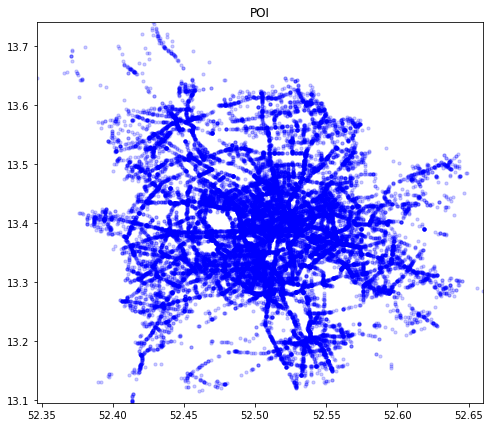

In [44]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data_all.long, data_all.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [45]:
data_ = data_all[data_all.IstFuss == 1]

(13.09467645, 13.74096)

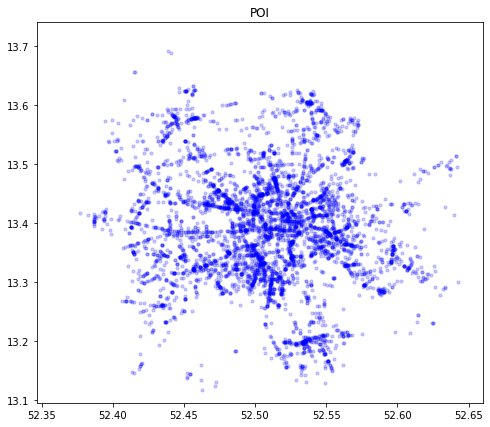

In [46]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data_.long, data_.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [47]:
data_b = data_all[data_all.IstRad == 1]

(13.09467645, 13.74096)

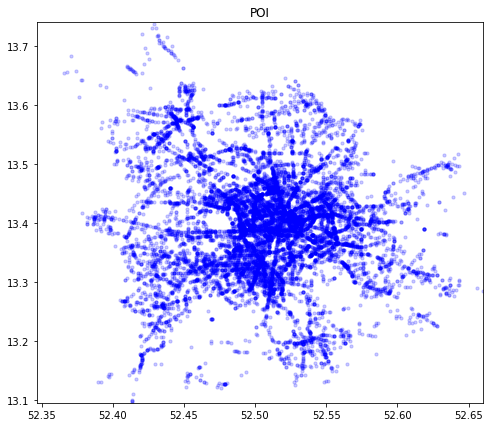

In [48]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data_b.long, data_b.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [49]:
data_mor = data_all[data_all.time_of_day == "morning"]

In [50]:
data_aft = data_all[data_all.time_of_day == "afternoon"]

(13.09467645, 13.74096)

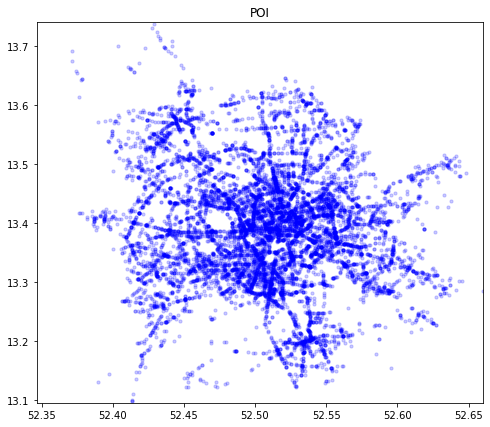

In [51]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data_mor.long, data_mor.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

(13.09467645, 13.74096)

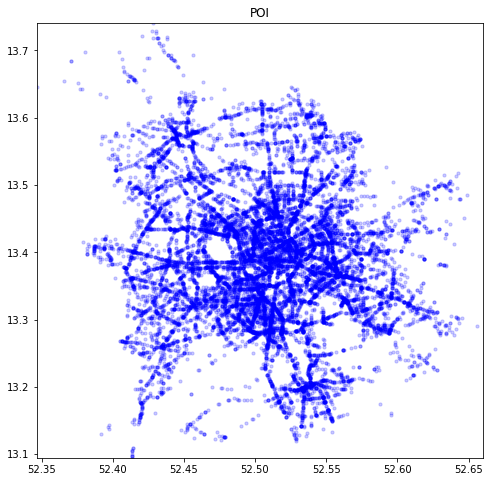

In [58]:
im = plt.imread("./plots/berlin-map-germany-240109189.png")
# implot = plt.imshow(im)
# plt.show()

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(data_aft.long, data_aft.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(im, zorder=0, extent = BBox, aspect= 'equal')

In [54]:
len(data_all[data_all.IstPKW == 1]) / len(data_all)

0.809245579264369

In [55]:
len(data_all[data_all.IstFuss == 1]) / len(data_all)

0.139687524130653

In [56]:
len(data_all[data_all.IstRad == 1]) / len(data_all)

0.3939666932640086

In [57]:
data_all.USTRZUSTAND = data_all.USTRZUSTAND.astype(str)

C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
data_dry = data_all[data_all.USTRZUSTAND == "0"] 
data_dry

,BEZ,LOR,UJAHR,UMONAT,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,...,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,weekday,accident_outcome,time_of_day,long,lat
1,12,12304314.0,2018,1,2,6,0,0,1,0,...,0,"790639,5854","5835009,589","13,29102205","52,58725906",Mon,slightly_injured,morning,52.587259,13.291022
2,2,2040501.0,2018,1,6,4,0,0,1,1,...,0,"799827,9618","5828733,523","13,42057818","52,52601854",Tue,slightly_injured,morning,52.526019,13.420578
3,7,7020202.0,2018,1,6,7,2,0,1,1,...,0,"795223,509","5823525,402","13,34828776","52,48184447",Mon,slightly_injured,afternoon,52.481844,13.348288
5,10,10010206.0,2018,1,2,6,2,0,1,0,...,0,"808320,0275","5832060,055","13,54844656","52,5510946",Mon,seriously_injured,night,52.551095,13.548447
8,1,1011303.0,2018,1,6,4,0,0,1,1,...,0,"799255,9754","5827907,973","13,41142938","52,51893299",Mon,slightly_injured,afternoon,52.518933,13.411429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11795,6,6020306.0,2020,12,0,6,2,0,1,0,...,0,"796359,4812","5816732,163","13,35893893","52,42033316",Tue,slightly_injured,afternoon,52.420333,13.358939
11798,3,3051021.0,2020,12,5,3,0,1,1,0,...,0,"803555,86","5832303,912","13,47862205","52,55595603",Thu,slightly_injured,afternoon,52.555956,13.478622
11804,2,2020203.0,2020,12,5,2,2,0,1,0,...,0,"797507,6146","5824015,479","13,38226078","52,48499784",Sun,slightly_injured,night,52.484998,13.382261
11807,1,1011306.0,2020,12,5,3,0,0,1,0,...,0,"799900,8048","5826514,725","13,41964879","52,50609051",Tue,slightly_injured,afternoon,52.506091,13.419649


In [59]:
data_wet = data_all[data_all.USTRZUSTAND == "1"]
data_wet

,BEZ,LOR,UJAHR,UMONAT,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,...,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,weekday,accident_outcome,time_of_day,long,lat
0,2,2050602.0,2018,1,6,4,0,0,1,1,...,1,"803604,1562","5827580,738","13,4750178","52,51359681",Wed,slightly_injured,afternoon,52.513597,13.475018
4,3,3020209.0,2018,1,6,7,1,1,0,1,...,1,"798261,3849","5835047,26","13,40322797","52,58347154",Wed,slightly_injured,afternoon,52.583472,13.403228
6,4,4061757.0,2018,1,2,6,2,0,1,0,...,1,"788961,8201","5823583,542","13,25639043","52,48571541",Mon,slightly_injured,afternoon,52.485715,13.256390
7,3,3010104.0,2018,1,2,6,2,0,1,0,...,1,"799543,5822","5840743,375","13,42725182","52,63382261",Thu,slightly_injured,afternoon,52.633823,13.427252
9,12,12103218.0,2018,1,0,1,2,0,0,0,...,1,"794735,9234","5833763,947","13,35020475","52,57388905",Sat,slightly_injured,evening,52.573889,13.350205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11802,1,3071536.0,2020,12,2,6,2,0,1,0,...,1,"799079,6971","5829018,851","13,40983818","52,52898708",Tue,slightly_injured,afternoon,52.528987,13.409838
11803,2,2010104.0,2020,12,6,4,2,0,1,1,...,1,"799823,1555","5825723,82","13,41779604","52,49904396",Tue,slightly_injured,afternoon,52.499044,13.417796
11805,7,7040403.0,2020,12,6,2,1,0,1,1,...,1,"797339,7447","5821935,194","13,37794126","52,46644169",Wed,slightly_injured,morning,52.466442,13.377941
11806,12,12231101.0,2020,12,5,3,2,0,1,0,...,1,"791814,8333","5837953,171","13,31091476","52,61301792",Tue,slightly_injured,afternoon,52.613018,13.310915


In [60]:
data_ice = data_all[data_all.USTRZUSTAND == "2"]
data_ice

,BEZ,LOR,UJAHR,UMONAT,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,...,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,weekday,accident_outcome,time_of_day,long,lat
31,12,12231101.0,2018,1,6,2,1,0,1,1,...,2,"792159,9652","5838427,271","13,31641633","52,61708257",Tue,slightly_injured,morning,52.617083,13.316416
58,7,7050502.0,2018,1,0,1,2,0,0,0,...,2,"798461,0121","5818169,422","13,39103313","52,43207457",Mon,slightly_injured,evening,52.432075,13.391033
214,4,4030623.0,2018,3,0,1,0,1,0,0,...,2,"792853,0661","5826761,234","13,31632696","52,51212916",Mon,slightly_injured,morning,52.512129,13.316327
470,3,3061429.0,2018,2,5,3,2,0,1,0,...,2,"801341,8612","5830997,418","13,44487861","52,5454754",Sat,slightly_injured,night,52.545475,13.444879
889,4,4020310.0,2018,3,9,1,0,0,1,0,...,2,"790428,3141","5827768,775","13,28157726","52,5224583",Sun,slightly_injured,morning,52.522458,13.281577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11592,5,5020627.0,2020,12,0,7,0,1,0,0,...,2,"785967,8654","5827981,213","13,21619771","52,52672072",Sat,slightly_injured,morning,52.526721,13.216198
11739,6,6020306.0,2020,12,0,1,0,1,0,0,...,2,"795501,9004","5816531,304","13,34618746","52,41899631",Tue,slightly_injured,morning,52.418996,13.346187
11741,11,11041128.0,2020,12,0,1,0,1,0,0,...,2,"805526,1532","5825987,617","13,50179065","52,49824545",Tue,seriously_injured,morning,52.498245,13.501791
11746,9,9052001.0,2020,12,1,1,0,1,1,0,...,2,"811638,7711","5822308,428","13,58810804","52,461819",Tue,slightly_injured,morning,52.461819,13.588108


(13.09467645, 13.74096)

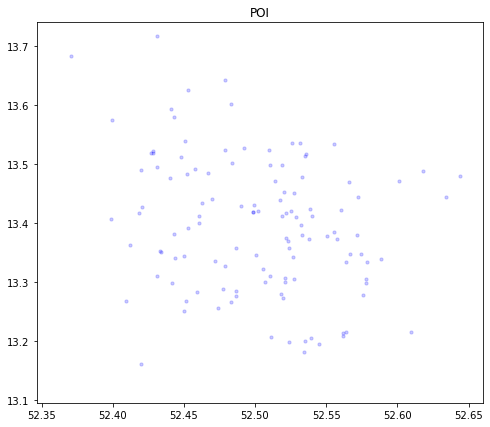

In [61]:
data_dead = data_all[data_all.accident_outcome == "killed"]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data_dead.long, data_dead.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [62]:
data_dead

,BEZ,LOR,UJAHR,UMONAT,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,...,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,weekday,accident_outcome,time_of_day,long,lat
39,7,7020203.0,2018,1,5,2,2,1,0,0,...,1,"795793,405","5824123,78","13,35718628","52,48690005",Tue,killed,morning,52.486900,13.357186
526,2,2050602.0,2018,11,6,4,2,0,1,1,...,0,"803314,7001","5827611,831","13,47079378","52,51403653",Sun,killed,night,52.514037,13.470794
1088,1,1011303.0,2018,9,5,2,0,1,0,0,...,0,"799816,3329","5828650,909","13,4203328","52,52528445",Mon,killed,afternoon,52.525284,13.420333
1204,11,11041027.0,2018,11,6,4,2,0,1,1,...,0,"806954,1768","5827356,825","13,52402307","52,50971524",Sat,killed,morning,52.509715,13.524023
1380,6,6040701.0,2018,11,6,4,2,0,1,1,...,1,"782842,3468","5815847,167","13,15995946","52,41955183",Fri,killed,afternoon,52.419552,13.159959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,9,9010302.0,2020,10,3,6,2,0,1,0,...,0,"804626,6973","5820775,556","13,48382143","52,45203431",Sat,killed,evening,52.452034,13.483821
10577,4,4020310.0,2020,10,6,4,2,0,1,1,...,0,"789816,3641","5827411,635","13,27227181","52,5195821",Sat,killed,evening,52.519582,13.272272
10879,11,11030721.0,2020,11,5,2,0,1,0,0,...,0,"805214,5375","5828280,242","13,4993166","52,51896737",Fri,killed,morning,52.518967,13.499317
11078,4,4030519.0,2020,11,3,6,2,1,1,0,...,1,"792110,8292","5827689,526","13,30623586","52,52084908",Tue,killed,evening,52.520849,13.306236
